In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 13 描述性统计

## 13.1 数据类型
- 定性数据
- 定量数据

## 13.2 图表
- 频数分布表
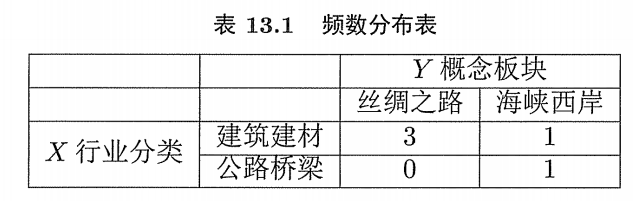
- 直方图

In [2]:
returns = pd.read_csv('./013/retdata.csv')
returns.head()

,Unnamed: 0,date,gsyh,pfyh,zglt
0,2014/1/3,2014/1/3,-0.005587,0.000000,-0.018576
1,2014/1/6,2014/1/6,-0.002809,0.005470,-0.028391
2,2014/1/7,2014/1/7,0.000000,-0.005441,0.003247
3,2014/1/8,2014/1/8,0.005634,0.006565,-0.012945
4,2014/1/9,2014/1/9,-0.011204,0.009783,-0.009836


In [3]:
gsyh = returns.gsyh

(array([  1.,   1.,   1.,   2.,  21., 178.,  42.,   6.,   4.,   2.]),
 array([-0.09287257, -0.07609117, -0.05930977, -0.04252836, -0.02574696,
        -0.00896556,  0.00781584,  0.02459725,  0.04137865,  0.05816005,
         0.07494145]),
 <BarContainer object of 10 artists>)

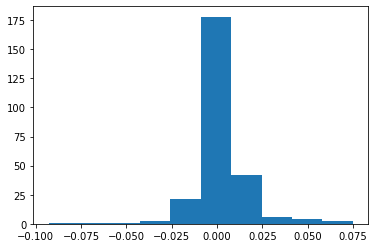

In [4]:
# 直方图
plt.hist(gsyh)

In [5]:
gsyh

0     -0.005587
1     -0.002809
2      0.000000
3      0.005634
4     -0.011204
         ...   
253    0.030023
254    0.035874
255   -0.002165
256    0.021692
257    0.033970
Name: gsyh, Length: 258, dtype: float64

## 13.3 数据的位置
- 样本平均数
    - 算术平均数
    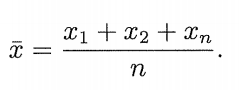
    - 几何平均数
    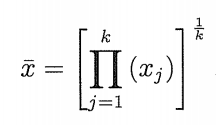
- 中位数
- 众数
- 百分位数

In [6]:
# 平均数
returns.zglt.mean()

0.001810969945736434

In [7]:
returns.pfyh.mean()

0.0022648093178294576

In [8]:
# 中位数
returns.zglt.median()

0.0

In [9]:
returns.pfyh.median()

0.0

In [10]:
# 众数
returns.zglt.mode()

0    0.0
Name: zglt, dtype: float64

In [11]:
returns.pfyh.mode()

0    0.0
Name: pfyh, dtype: float64

In [12]:
# 上下四分位数
[returns.zglt.quantile(i) for i in [0.25, 0.75]]

[-0.0065253375, 0.008766644]

In [13]:
[returns.pfyh.quantile(i) for i in [0.25, 0.75]]

[-0.005472016, 0.009404664]

## 13.4 数据的离散度
- 极差
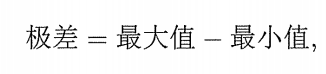
- 平均绝对偏差
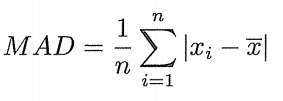
- 方差和标准差
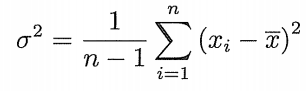
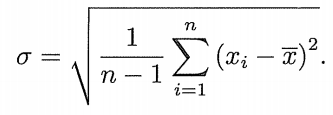

In [14]:
# 极差
returns.zglt.max() - returns.zglt.min()

0.182285158

In [15]:
# 平均绝对值偏差
returns.zglt.mad()

<ipython-input-15-e0dfcecfe75f>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  returns.zglt.mad()


0.011888591205937145

In [16]:
(returns.zglt - returns.zglt.mean()).abs().mean()

0.011888591205937145

In [17]:
# 方差
returns.zglt.var()

0.0003140948097641627

In [18]:
# 标准差
returns.zglt.std()

0.017722720157023378

## 习题

In [19]:
history = pd.read_csv('./013/history.csv',sep=';',index_col='date')
history.index = pd.to_datetime(history.index, format='%d/%m/%Y')
history = history.loc['1997-01-31': '2009-08-31']
history.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19%,3.93%,1.78%,7.91%,1.89%,2.13%,1.91%,5.73%,2.81%,1.50%,1.80%,-1.66%,3.17%
1997-02-28,1.23%,2.98%,1.22%,5.25%,1.01%,0.84%,1.22%,1.75%,-0.06%,0.34%,1.18%,4.26%,1.06%
1997-03-31,0.78%,-0.21%,-0.12%,-1.20%,0.16%,-0.23%,1.09%,-1.19%,-0.84%,0.60%,0.10%,7.78%,-0.77%
1997-04-30,0.86%,-1.70%,0.30%,1.19%,1.19%,-0.05%,1.30%,1.72%,0.84%,-0.01%,1.22%,-1.29%,0.09%
1997-05-31,1.56%,-0.15%,2.33%,3.15%,1.89%,3.46%,1.18%,1.08%,3.94%,1.97%,1.73%,-7.37%,2.75%


In [20]:
def str2float(x):
    sign = 1
    if x.startswith('-'):
        sign = -1
    temp = x.strip('%').strip('-')
    return sign * (float(temp) / 100)

em = history['Emerging Markets'].apply(str2float)
em

date
1997-01-31    0.0791
1997-02-28    0.0525
1997-03-31   -0.0120
1997-04-30    0.0119
1997-05-31    0.0315
               ...  
2009-04-30    0.0663
2009-05-31    0.0884
2009-06-30    0.0013
2009-07-31    0.0451
2009-08-31    0.0166
Name: Emerging Markets, Length: 152, dtype: float64

In [21]:
em.mean()

0.008246052631578946

In [22]:
em.median()

0.013649999999999999

In [23]:
em.mode()

0    0.016
Name: Emerging Markets, dtype: float64

In [24]:
[em.quantile(i) for i in [0.1, 0.9]]

[-0.03844, 0.04798000000000002]

In [25]:
em.quantile([0.1, 0.9])

0.1   -0.03844
0.9    0.04798
Name: Emerging Markets, dtype: float64

In [27]:
ed = history['Event Driven'].apply(str2float)
ed.head()

date
1997-01-31    0.0213
1997-02-28    0.0084
1997-03-31   -0.0023
1997-04-30   -0.0005
1997-05-31    0.0346
Name: Event Driven, dtype: float64

In [28]:
# 极差
ed.max() - ed.min()

0.1328

In [29]:
# 平均绝对偏差
ed.mad()

<ipython-input-29-ad44bd65c0c1>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  ed.mad()


0.012804657202216066

In [31]:
# 平均绝对偏差
(ed - ed.mean()).abs().mean()

0.012804657202216066

In [32]:
# 方差
ed.var()

0.00033673989369118157

In [33]:
# 标准差
ed.std()

0.018350473936418688

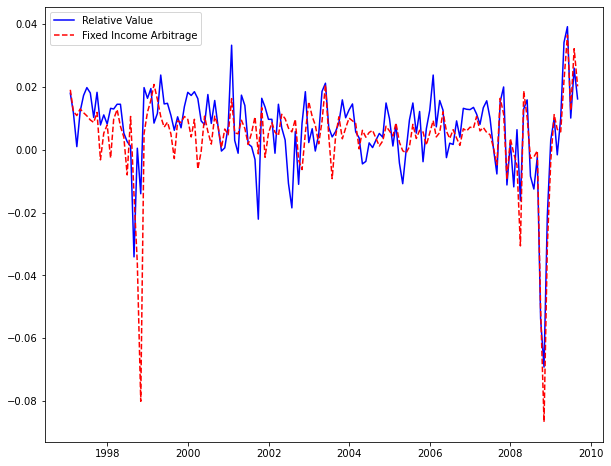

In [38]:
plt.figure(figsize=(10,8))
plt.plot(history.index, history['Relative Value'].apply(str2float), '-b', label='Relative Value')
plt.plot(history.index, history['Fixed Income Arbitrage'].apply(str2float), '--r', label='Fixed Income Arbitrage')
plt.legend()
plt.show()

In [40]:
history.describe()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
count,152,152,152,152,152,152,152,152,152,152,152,152,152
unique,124,144,134,138,107,133,116,137,134,124,118,146,140
top,0.92%,-0.16%,0.88%,1.60%,0.75%,1.33%,1.06%,1.16%,2.81%,1.33%,1.00%,-6.56%,-0.68%
freq,3,3,3,3,4,3,5,3,2,3,3,2,3


# 14 随机变量简介

## 14.1 概率和概率分布
### 14.1.1 离散型随机变量
- 概率质量函数
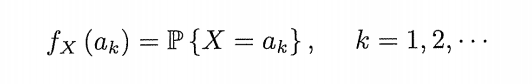
- 累计分布函数
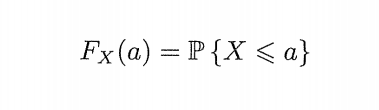
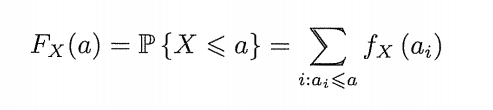

In [41]:
# numpy.random.choice()
import numpy as np
import pandas as pd

In [43]:
random_number = np.random.choice([1, 2, 3, 4, 5], size=100, replace=True, p=[
                                 0.1, 0.1, 0.3, 0.3, 0.2])

In [44]:
pd.Series(random_number).value_counts()

3    31
4    29
5    23
1    14
2     3
dtype: int64

In [45]:
pd.Series(random_number).value_counts() / 100

3    0.31
4    0.29
5    0.23
1    0.14
2    0.03
dtype: float64

<AxesSubplot:>

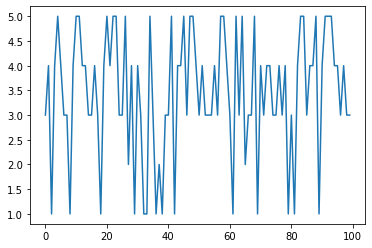

In [46]:
pd.Series(random_number).plot()

### 14.1.2 连续型随机变量
- 累积分布函数
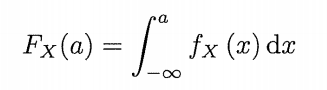
- 概率密度函数
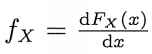

In [48]:
# 读取沪深300收益数据
HSRet300 = pd.read_csv('./014/return300.csv')
HSRet300.head()

,date,return,sig
0,2014/1/2,-0.3454,0
1,2014/1/3,-1.3436,0
2,2014/1/6,-2.2762,0
3,2014/1/7,-0.0284,0
4,2014/1/8,0.1747,1


In [49]:
import matplotlib.pyplot as plt
from scipy import stats

In [51]:
# 使用stats 中的 gaussian_kde 估算概率密度
density = stats.kde.gaussian_kde(HSRet300.iloc[:, 1])

<ipython-input-51-1a3038d433c6>:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(HSRet300.iloc[:, 1])


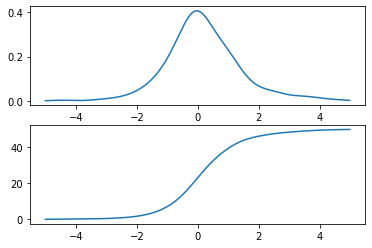

In [54]:
# plot 绘制概率密度函数
bins = np.arange(-5, 5, 0.02)
plt.subplot(2, 1, 1)
plt.plot(bins, density(bins))
# plt.title('沪深300收益率概率密度曲线')

# 绘制累计分布函数
plt.subplot(2, 1, 2)
plt.plot(bins, density(bins).cumsum())
# plt.title('沪深300收益率累计分布函数')


## 14.2 期望值和方差
- 离散型
    - 期望
    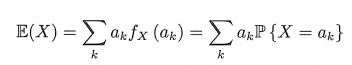
    - 方差
    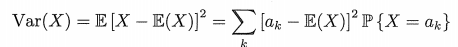
    - 伯努利随机变量
    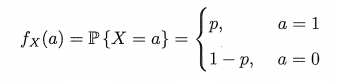
        - 期望
        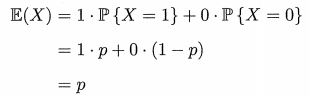
        - 方差
        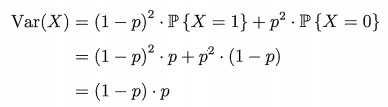
- 连续型
    - 期望
    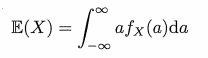
    - 方差
    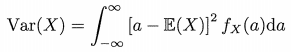

## 14.3 二项分布
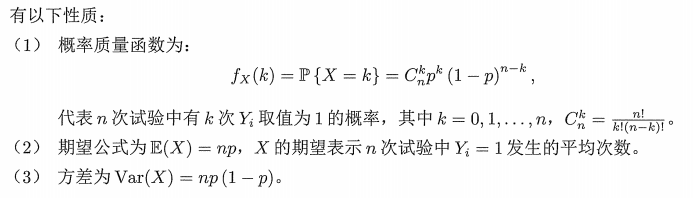

In [55]:
# numpy 生成二项分布随机数
np.random.binomial(100, 0.5, 20)

array([53, 46, 46, 44, 57, 55, 60, 49, 54, 57, 57, 54, 53, 56, 47, 54, 49,
       43, 43, 47])

In [57]:
np.random.binomial(10, 0.5, 3)

array([6, 4, 5])

In [58]:
# 求解二项分布的概率质量函数
# 100次实验，20次朝上的概率
stats.binom.pmf(20, 100, 0.5)

4.2281632676015583e-10

In [61]:
# 100 次实验， 50 次朝上的概率值
stats.binom.pmf(50, 100, 0.5)

0.07958923738717875

In [62]:
# 求解二项分布的累积分布函数
dd = stats.binom.pmf(np.arange(0, 21, 1), 100, 0.5)
dd

array([7.88860905e-31, 7.88860905e-29, 3.90486148e-27, 1.27558808e-25,
       3.09330110e-24, 5.93913812e-23, 9.40363535e-22, 1.26277389e-20,
       1.46797465e-19, 1.50059631e-18, 1.36554264e-17, 1.11726216e-16,
       8.28636101e-16, 5.60922899e-15, 3.48573516e-14, 1.99848816e-13,
       1.06169683e-12, 5.24603142e-12, 2.41900338e-11, 1.04399093e-10,
       4.22816327e-10])

In [63]:
dd.sum()

5.579544528625955e-10

In [64]:
stats.binom.cdf(20, 100, 0.5)

5.579544528625976e-10

In [65]:
stats.binom.cdf(50, 100, 0.5)

0.5397946186935895

In [66]:
# 二项分布再金融市场中的应用

# 获取沪深300的收益率数据
ret = HSRet300.iloc[:, 1]
ret.head(2)

0   -0.3454
1   -1.3436
Name: return, dtype: float64

In [67]:
# 估算沪深300上涨的概率
p = len(ret[ret > 0])/len(ret)
p

0.5306122448979592

In [68]:
# 估计10个交易日中，6个交易日上涨的概率
prob = stats.binom.pmf(6, 10, p)
prob

0.22751494315662343

## 14.4 正态分布
- 概率密度函数
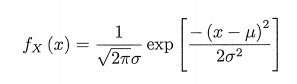
- 标准化
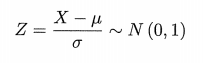

In [69]:
# python 正态分布相关函数

# 生成5个标准正态分布随机数
norm = np.random.normal(size=5)
norm

array([ 1.24897429, -0.15702974,  0.17169914,  0.45070981,  0.98013151])

In [70]:
# 求生成的正态分布随机数的密度值
stats.norm.pdf(norm)

array([0.18288332, 0.39405385, 0.39310488, 0.36041173, 0.24677768])

In [71]:
# 累积密度值
stats.norm.cdf(norm)

array([0.89416276, 0.4376107 , 0.56816297, 0.67390065, 0.8364894 ])

In [72]:
# 正态分布在金融市场的应用

# 沪深300收益率的均值和方差
HS300_RetMean = ret.mean()
print(HS300_RetMean)

HS300_RetVar = ret.var()
print(HS300_RetVar)

# 累计密度值为0.05的分位数
stats.norm.ppf(0.05, HS300_RetMean, HS300_RetVar ** 0.5)

0.1774236734693877
1.4712059348471052


-1.8176732130631714

## 14.5 其他连续分布
### 14.5.1 卡方分布
- 自由度为 n 的卡方分布，期望=n, 方差=2n
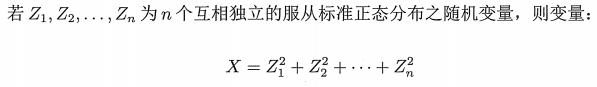


In [73]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Probability Density Plot of Chi-Square Distribution')

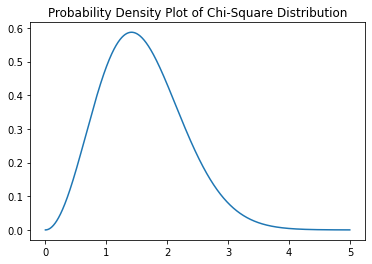

In [74]:
plt.plot(np.arange(0, 5, 0.002), stats.chi.pdf(np.arange(0, 5, 0.002), 3))
plt.title('Probability Density Plot of Chi-Square Distribution')

### 14.5.2 t分布
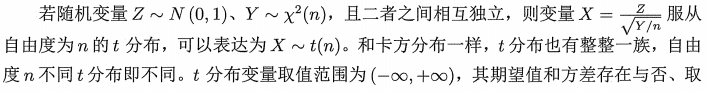
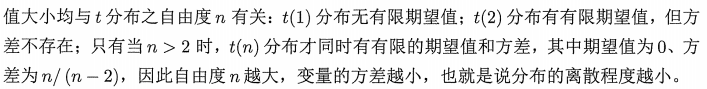

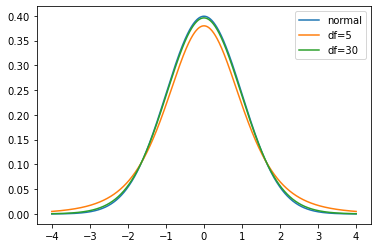

In [76]:
x = np.arange(-4, 4.004, 0.004)
plt.plot(x, stats.norm.pdf(x), label='normal')
plt.plot(x, stats.t.pdf(x, 5), label='df=5')
plt.plot(x, stats.t.pdf(x, 30), label='df=30')
plt.legend()

### 14.5.3 F分布
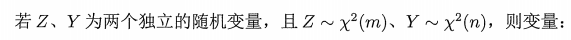
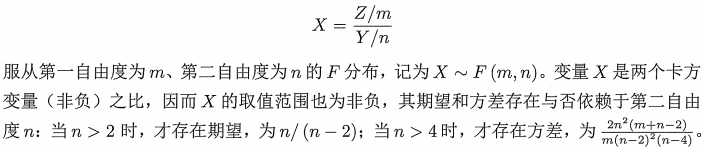

Text(0.5, 1.0, 'Probability Density Plot of F Distribution')

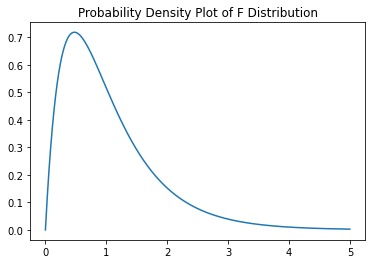

In [77]:
plt.plot(np.arange(0, 5, 0.002), stats.f.pdf(np.arange(0, 5, 0.002), 4, 40))
plt.title('Probability Density Plot of F Distribution')

## 14.6 变量的关系
### 14.6.1 联合概率分布
- X 和 Y 的联合概率质量函数
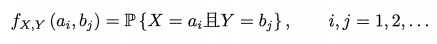
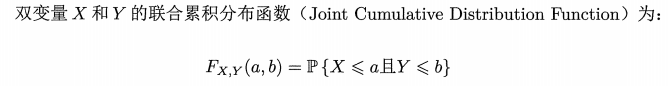
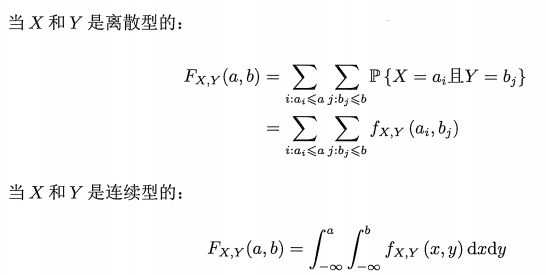

### 14.6.2 变量的独立性
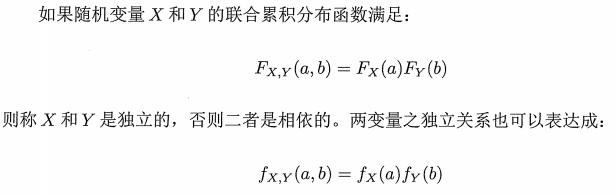

### 14.6.3 变量的相关性
- X 和 Y 的协方差
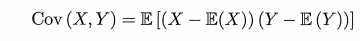
- 协方差的性质
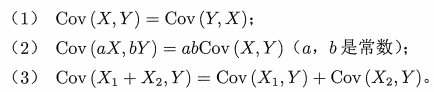
- 相关系数
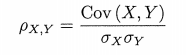

### 上证综指和深证综指相关性分析

In [78]:
# 读取数据
TRD_Index = pd.read_csv('./014/TRD_Index.txt', sep='\t')
TRD_Index.head()

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
0,1,2009-01-05,1,1849.020,1880.716,1844.094,1880.716,0.032904
1,1,2009-01-06,2,1878.827,1938.690,1871.971,1937.145,0.030004
2,1,2009-01-07,3,1938.974,1948.233,1920.515,1924.012,-0.006780
3,1,2009-01-08,4,1890.242,1894.171,1862.263,1878.181,-0.023821
4,1,2009-01-09,5,1875.164,1909.349,1875.164,1904.861,0.014205


In [79]:
SHindex = TRD_Index[TRD_Index.Indexcd==1]
SHindex.head()

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
0,1,2009-01-05,1,1849.020,1880.716,1844.094,1880.716,0.032904
1,1,2009-01-06,2,1878.827,1938.690,1871.971,1937.145,0.030004
2,1,2009-01-07,3,1938.974,1948.233,1920.515,1924.012,-0.006780
3,1,2009-01-08,4,1890.242,1894.171,1862.263,1878.181,-0.023821
4,1,2009-01-09,5,1875.164,1909.349,1875.164,1904.861,0.014205


In [80]:
SZindex = TRD_Index[TRD_Index.Indexcd==399106]
SZindex.head()

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
13012,399106,2009-01-05,1,560.097,571.134,557.687,571.134,0.032230
13013,399106,2009-01-06,2,569.278,587.676,566.723,586.332,0.026610
13014,399106,2009-01-07,3,585.504,590.658,582.341,584.705,-0.002775
13015,399106,2009-01-08,4,573.940,577.834,567.622,573.093,-0.019860
13016,399106,2009-01-09,5,572.256,586.657,572.256,585.852,0.022263


0.9082776348014548

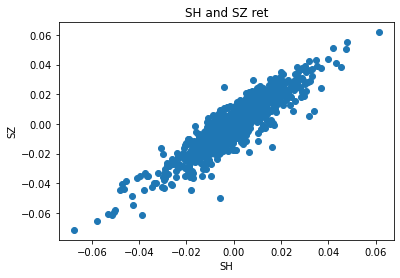

In [83]:
# 上证和深证收益率散点图
plt.scatter(SHindex.Retindex, SZindex.Retindex)
plt.title('SH and SZ ret')
plt.xlabel('SH')
plt.ylabel('SZ')

# 相关系数
SZindex.index = SHindex.index
SZindex.Retindex.corr(SHindex.Retindex)

## 习题

In [84]:
# 1
Bwages = pd.read_csv('/jupyterProject/PythonQuant/Data/Part2/002/Bwages.csv')
Bwages.head()

,wage,educ,exper
0,7.780208,1,23
1,4.818505,1,15
2,10.563645,1,31
3,7.042429,1,32
4,7.887521,1,9


<AxesSubplot:>

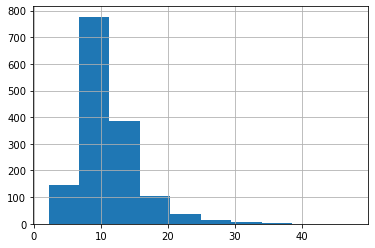

In [87]:
Bwages.wage.hist()

<AxesSubplot:>

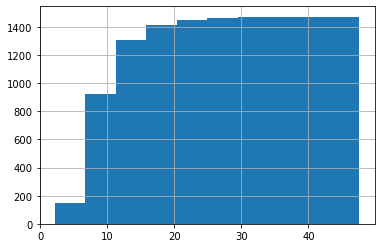

In [88]:
Bwages.wage.hist(cumulative=True)

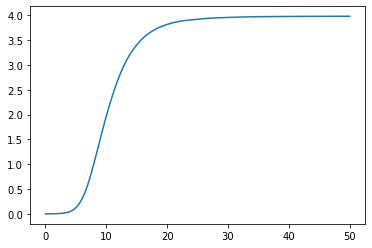

In [98]:
kde = stats.gaussian_kde(Bwages.wage)
bins = np.linspace(0, 50, num=200)
plt.plot(bins, kde(bins).cumsum())

In [100]:
# 2
history = pd.read_csv('/jupyterProject/PythonQuant/Data/Part2/001/history.csv', index_col='Date')
history.head()

,Convertible.Arbitrage,CTA.Global,Distressed.Securities,Emerging.Markets,Equity.Market.Neutral,Event.Driven,Fixed.Income.Arbitrage,Global.Macro,Long.Short.Equity,Merger.Arbitrage,Relative.Value,Short.Selling
Date,,,,,,,,,,,,
1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166
1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426
1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778
1997-04-30,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129
1997-05-31,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737


In [104]:
revenue = len(history['Emerging.Markets'][history['Emerging.Markets'] > 0])
revenue

105

In [106]:
loss = len(history['Emerging.Markets'][history['Emerging.Markets'] < 0])
loss

47

In [108]:
p = revenue / (revenue + loss)
p

0.6907894736842105

In [110]:
1 - stats.binom.cdf(6, 12, p)

0.8670095700956825

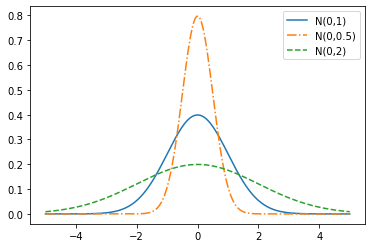

In [112]:
# 3
norm_bins=np.linspace(-5, 5, num=200)
plt.plot(norm_bins, stats.norm.pdf(norm_bins, 0, 1), '-',label='N(0,1)')
plt.plot(norm_bins, stats.norm.pdf(norm_bins, 0, 0.5),'-.', label='N(0,0.5)')
plt.plot(norm_bins, stats.norm.pdf(norm_bins, 0, 2), '--',label='N(0,2)')
plt.legend()

# 15 推断估计
## 15.1 参数估计
### 15.1.1 点估计
- 矩估计
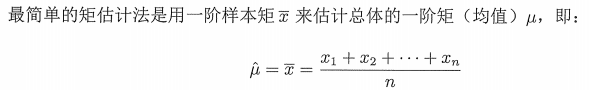
### 15.1.2 区间估计
- 总体方差已知
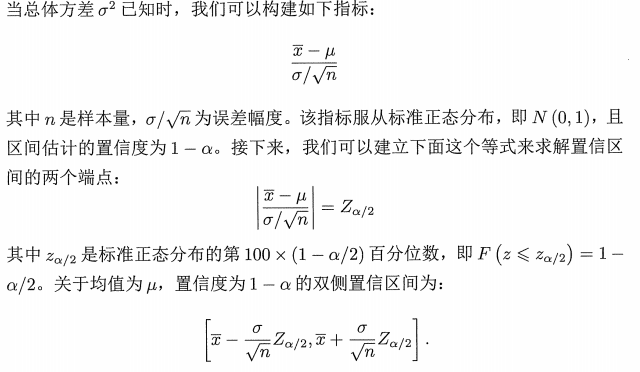
- 总体方差未知
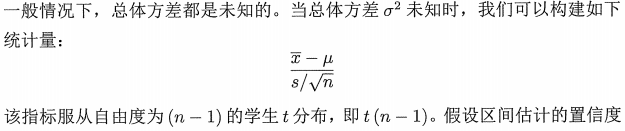
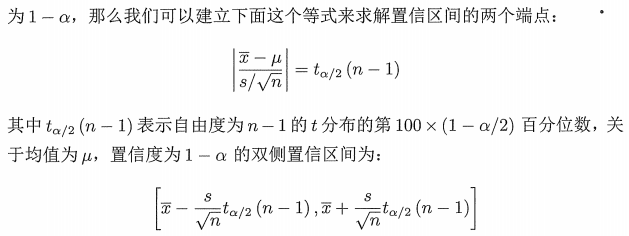

In [113]:
# python 进行区间估计

from scipy import stats
import numpy as np

In [115]:
# 构造样本
x = [10.1, 10, 9.8, 10.5, 9.7, 10.1, 9.9, 10.2, 10.3, 9.9]
# 区间估计
stats.t.interval(0.95, len(x) - 1, np.mean(x), stats.sem(x))

(9.877224892797548, 10.222775107202454)

## 15.2 案例分析

In [116]:
import pandas as pd

In [117]:
SHindex = pd.read_csv('./015/TRD_Index.csv')
SHindex.head()

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
0,1,2010/1/4,1,3289.750,3295.279,3243.319,3243.760,-0.010185
1,1,2010/1/5,2,3254.468,3290.512,3221.462,3282.179,0.011844
2,1,2010/1/6,3,3277.517,3295.868,3253.044,3254.215,-0.008520
3,1,2010/1/7,4,3253.991,3268.819,3176.707,3192.776,-0.018880
4,1,2010/1/8,5,3177.259,3198.920,3149.017,3195.997,0.001009


<AxesSubplot:>

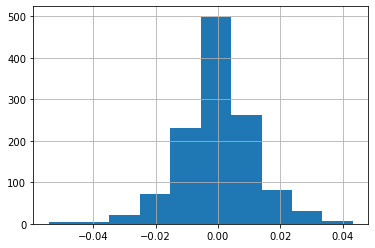

In [118]:
# 取上证的收益率指数序列
Retindex = SHindex.Retindex

# 直方图
Retindex.hist()

<AxesSubplot:>

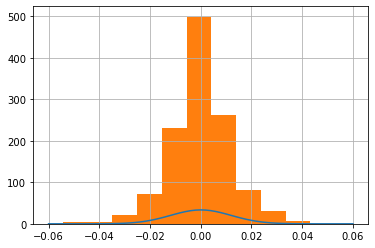

In [123]:
# 均值
mu = Retindex.mean()
# 标准差
sigma = Retindex.std()

# 添加正态分布
plt.plot(np.arange(-0.06, 0.062, 0.002),
         stats.norm.pdf(np.arange(-0.06, 0.062, 0.002), mu, sigma))
Retindex.hist()

In [124]:
# 区间估计
stats.t.interval(0.95, len(Retindex) - 1, mu, stats.sem(Retindex))

(-0.0006112437012950779, 0.0007318872656515136)

## 15.3 假设检验
- 小概率事件思想
- 反证法思想
### 15.3.1 两类错误
- 第一类错误：弃真 alpha
- 第二类错误：取伪 beta
### 15.3.2 显著性水平和 p 值
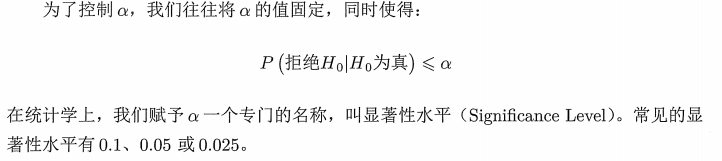
- p值：得到的样本或更极端的情况出现的概率
### 15.3.3 确定小概率事件
- 临界值检验法
- 显著性校验法
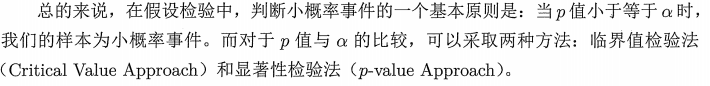

## 15.4 t检验
t 检验所使用的统计量服从 t 分布，用于检验标准差未知，服从正态分布的总体的均值
### 15.4.1 单样本 t 检验
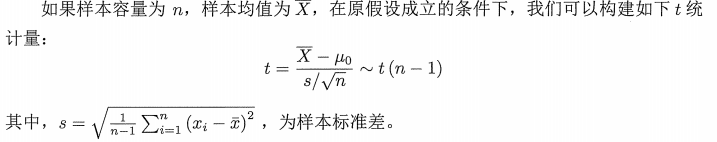
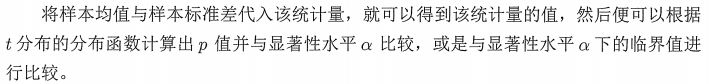

In [125]:
# python 单样本 t 检验
# 检验上证综指的收益率均值是否为0
TRD_Index = pd.read_csv('./015/TRD_Index.txt', sep='\t')
SHindexH = TRD_Index[TRD_Index.Indexcd==1]

In [126]:
SHRet = SHindex.Retindex

In [128]:
stats.ttest_1samp(SHRet, 0)

TtestResult(statistic=0.17622526193788152, pvalue=0.8601464395257946, df=1211)

### 15.4.2 独立样本 t 检验
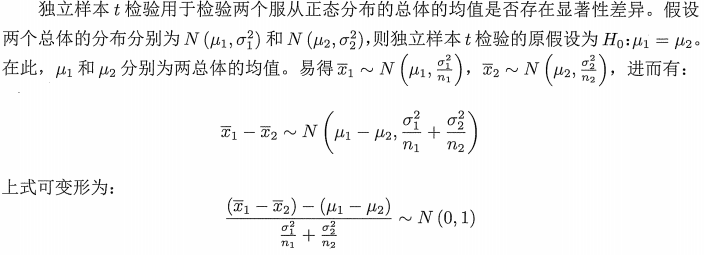

In [133]:
# python 进行独立样本 t 检验
# 检验上证综指和深证综指的收益率均值是否相等
SZindex = TRD_Index[TRD_Index.Indexcd == 399106]
SZRet = SZindex.Retindex
stats.ttest_ind(SHRet[1:], SZRet)

Ttest_indResult(statistic=-1.0305464879846185, pvalue=0.3028565240669423)

### 15.4.3 配对样本 t 检验
两个样本并不互相独立时，可以使用配对样本 t 检验对两个总体的均值差异进行检验
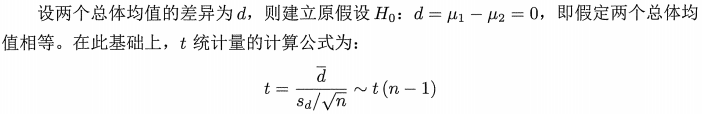

In [134]:
# python
stats.ttest_rel(SHRet[1:], SZRet)

TtestResult(statistic=-1.0247371191718675, pvalue=0.30569205992358917, df=1210)

## 习题

In [135]:
# 1
gold_list = [6.683,6.678,6.767,6.692,6.672,6.678]
stats.t.interval(0.9, len(gold_list) - 1, np.mean(gold_list), stats.sem(gold_list))

(6.665467336658989, 6.72453266334101)

In [141]:
import math
low = np.mean(gold_list) - stats.t.ppf(0.95, 5) * np.std(gold_list) / math.sqrt(6)
low

6.668040490174871

In [140]:
np.mean(gold_list) + stats.t.ppf(0.95, 5) * np.std(gold_list) / math.sqrt(6)

6.721959509825128

In [142]:
bo_list = [6.661,6.664,6.668,6.666,6.665]
stats.t.interval(0.9, len(bo_list) - 1, np.mean(bo_list), stats.sem(bo_list))

(6.662332208935751, 6.667267791064249)

In [143]:
# 2
life_list = [5.9, 7.3, 6.6, 5.8, 5.7, 5.3, 5.9, 7, 6.5]
stats.t.interval(0.95, len(life_list) - 1, np.mean(life_list), stats.sem(life_list))

(5.71411901303754, 6.7303254314069045)